In [2]:
import pickle
import scipy
import scipy.io
import os
import numpy as np
import scanpy as sc

In [18]:

adata = sc.read_h5ad("../../scripts/data/cohort2.h5ad")
adata

AnnData object with n_obs × n_vars = 139848 × 33417
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'percent.mito', 'meanCount_RNA', 'meanCount_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'demultID', 'experiment', 'cartridge', 'ID', 'sample', 'abseq', 'date_of_sampling', 'donor', 'cells', 'purification', 'nCount_AB', 'nFeature_AB', 'group_4', 'group', 'diagnosis', 'onset_of_symptoms', 'outcome', 'oxygen', 'highest_WHO_classification', 'primary_complaint', 'bacterial_superinfection', 'medication', 'comorbidities', 'age', 'sex', 'days_after_onset', 'disease_stage', 'who_per_sample', 'group_per_sample', 'glucocorticoids', 'covid19_therapy', 'leukocyte_counts', 'neutrophil_counts', 'lymphocyte_counts', 'monocyte_counts', 'eosinophil_counts', 'basophil_counts', 'imm_granulocyte_counts', 'thrombocyte_counts', 'pCT', 'CRP', 'IL6', 'group_4_per_sample', 'percent.hb', 'group_per_sample_per_stag

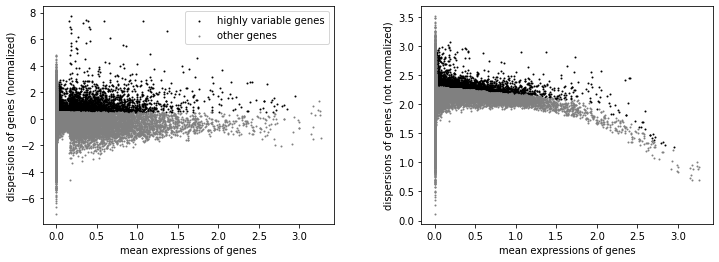

In [19]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [20]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [36]:
adata.raw[:, adata.var.index]

In [39]:
adata.var.index

Index(['GNLY', 'NKG7', 'RPS29', 'IL32', 'RPS27', 'ARL4C', 'GZMA', 'TXNIP',
       'CALM1', 'SYNE1',
       ...
       'IGLV3-19', 'AC010203.1', 'AC055748.1', 'CRISP3', 'GJB6', 'MS4A2',
       'CEACAM8', 'BTNL9', 'EPPK1', 'CEACAM6'],
      dtype='object', length=4509)

In [44]:
adata1 = sc.read_h5ad("../../scripts/data/cohort1.h5ad")
sc.pp.normalize_total(adata1, target_sum=1e4)
sc.pp.log1p(adata1)
adata1.raw = adata1
idx = adata1.var.index.isin(adata.var.index)
adata1 = adata1[:, idx]


In [46]:
adata

View of AnnData object with n_obs × n_vars = 139848 × 4509
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'percent.mito', 'meanCount_RNA', 'meanCount_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'demultID', 'experiment', 'cartridge', 'ID', 'sample', 'abseq', 'date_of_sampling', 'donor', 'cells', 'purification', 'nCount_AB', 'nFeature_AB', 'group_4', 'group', 'diagnosis', 'onset_of_symptoms', 'outcome', 'oxygen', 'highest_WHO_classification', 'primary_complaint', 'bacterial_superinfection', 'medication', 'comorbidities', 'age', 'sex', 'days_after_onset', 'disease_stage', 'who_per_sample', 'group_per_sample', 'glucocorticoids', 'covid19_therapy', 'leukocyte_counts', 'neutrophil_counts', 'lymphocyte_counts', 'monocyte_counts', 'eosinophil_counts', 'basophil_counts', 'imm_granulocyte_counts', 'thrombocyte_counts', 'pCT', 'CRP', 'IL6', 'group_4_per_sample', 'percent.hb', 'group_per_sample_p

In [ ]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(adata.obs["Condition"])
 
# printing label
np.unique(label)
label = label-1

In [ ]:
#cohort1 50 pc -harmony
Xall = []
state = []
samples = np.unique(adata.obs.SampleID[adata.obs.Condition == 'Mild'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_harmony'][adata.obs.SampleID == sample,:] )
    y= label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Mild')
Xall.append(X)

samples = np.unique(adata.obs.SampleID[adata.obs.Condition == 'Severe'])
print(len(samples))

X_ = []
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_harmony'][adata.obs.SampleID == sample,:] )
    y= label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Severe')
Xall.append(X)
with open("2cohorts/chr1chr2_50hp/Xall.pkl", "wb") as f:
            pickle.dump(Xall, f)
with open("2cohorts/chr1chr2_50hp/state.pkl", "wb") as f:
            pickle.dump(state, f)

In [ ]:
#cohort1 25 pc -harmony
Xall = []
state = []
samples = np.unique(adata.obs.SampleID[adata.obs.Condition == 'Mild'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_harmony'][adata.obs.SampleID == sample,:25] )
    y= label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Mild')
Xall.append(X)

samples = np.unique(adata.obs.SampleID[adata.obs.Condition == 'Severe'])
print(len(samples))

X_ = []
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_harmony'][adata.obs.SampleID == sample,:25] )
    y= label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Severe')
Xall.append(X)
with open("2cohorts/chr1chr2_25hp/Xall.pkl", "wb") as f:
            pickle.dump(Xall, f)
with open( "2cohorts/chr1chr2_25hp/state.pkl", "wb") as f:
            pickle.dump(state, f)

In [ ]:
#cohort1 25 pc -pca
Xall = []
state = []
samples = np.unique(adata.obs.SampleID[adata.obs.Condition == 'Mild'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.SampleID == sample,:25] )
    y= label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Mild')
Xall.append(X)

samples = np.unique(adata.obs.SampleID[adata.obs.Condition == 'Severe'])
print(len(samples))

X_ = []
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.SampleID == sample,:25] )
    y= label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Severe')
Xall.append(X)
with open("2cohorts/chr1chr2_25pp/Xall.pkl", "wb") as f:
            pickle.dump(Xall, f)
with open( "2cohorts/chr1chr2_25pp/state.pkl", "wb") as f:
            pickle.dump(state, f)
        

In [ ]:
Xall

In [ ]:
#cohort1 50 pc -pca
Xall = []
state = []
samples = np.unique(adata.obs.SampleID[adata.obs.Condition == 'Mild'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.SampleID == sample,:] )
    y= label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Mild')
Xall.append(X)

samples = np.unique(adata.obs.SampleID[adata.obs.Condition == 'Severe'])
print(len(samples))

X_ = []
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.SampleID == sample,:] )
    y= label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Severe')
Xall.append(X)
with open("2cohorts/chr1chr2_50pp/Xall.pkl", "wb") as f:
            pickle.dump(Xall, f)
with open( "2cohorts/chr1chr2_50pp/state.pkl", "wb") as f:
            pickle.dump(state, f)
Xall        

In [ ]:
#cohort1_xtest 50pc harmony
Xtest = []
samples = np.unique(adata.obs.SampleID[adata.obs.Condition != 'Control'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_harmony'][adata.obs.SampleID == sample,:] )
    y=label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
Xtest=X_
with open("2cohorts/chr2chr1_50ph/Xtest__.pkl", "wb") as f:
            pickle.dump(Xtest, f)

In [ ]:
#cohort1_xtest 50pc pca
Xtest = []
samples = np.unique(adata.obs.SampleID[adata.obs.Condition != 'Control'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.SampleID == sample,:] )
    y=label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
Xtest=X_
with open("2cohorts/chr2chr1_50pp/Xtest__.pkl", "wb") as f:
            pickle.dump(Xtest, f)

In [ ]:
#cohort1_xtest 25pc harmony
Xtest = []
samples = np.unique(adata.obs.SampleID[adata.obs.Condition != 'Control'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_harmony'][adata.obs.SampleID == sample,:25] )
    y=label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
Xtest=X_
with open("2cohorts/chr2chr1_25ph/Xtest__.pkl", "wb") as f:
            pickle.dump(Xtest, f)

In [ ]:
#cohort1_xtest 25pc pca
Xtest = []
samples = np.unique(adata.obs.SampleID[adata.obs.Condition != 'Control'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.SampleID == sample,:25] )
    y=label[adata.obs.SampleID == sample][0] 
    y_= adata.obs["new.id"][adata.obs.SampleID == sample].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
Xtest=X_
with open("2cohorts/chr2chr1_25pp/Xtest__.pkl", "wb") as f:
            pickle.dump(Xtest, f)

In [ ]:
len(Xall[1])

In [ ]:
# root = 'data/signature'      
# with open(root + "/Xall.pkl", "wb") as f:
#             pickle.dump(Xall, f)
# with open(root + "/state.pkl", "wb") as f:
#             pickle.dump(state, f)

In [5]:
adata = sc.read_h5ad("../../scripts/data/cohort2.h5ad")
label = le.fit_transform(adata.obs["Condition"])
 
# printing label
np.unique(label)
label = label-1

NameError: name 'sc' is not defined

In [ ]:
len(np.unique(adata.obs['blueprint.labels']))

In [ ]:
#cohort2 50 pc
Xall = []
state = []
samples = np.unique(adata.obs.ID[adata.obs.Condition == 'Mild'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.ID == sample,:] )
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Mild')
Xall.append(X)

samples = np.unique(adata.obs.ID[adata.obs.Condition == 'Severe'])
print(len(samples))

X_ = []
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.ID == sample,:] )
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Severe')
Xall.append(X)
with open("2cohorts/chr2chr1_50pp/Xall.pkl", "wb") as f:
            pickle.dump(Xall, f)
with open( "2cohorts/chr2chr1_50pp/state.pkl", "wb") as f:
            pickle.dump(state, f)

In [ ]:
#cohort2 25 pc
Xall = []
state = []
samples = np.unique(adata.obs.ID[adata.obs.Condition == 'Mild'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.ID == sample,:25] )
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Mild')
Xall.append(X)

samples = np.unique(adata.obs.ID[adata.obs.Condition == 'Severe'])
print(len(samples))

X_ = []
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.ID == sample,:25] )
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Severe')
Xall.append(X)
with open("2cohorts/chr2chr1_25pp/Xall.pkl", "wb") as f:
            pickle.dump(Xall, f)
with open( "2cohorts/chr2chr1_25pp/state.pkl", "wb") as f:
            pickle.dump(state, f)

In [ ]:
#cohort2_xtest 50pc
Xtest = []
samples = np.unique(adata.obs.ID[adata.obs.Condition != 'Control'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.ID == sample,:] )
    y=label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
Xtest=X_
with open("2cohorts/chr1chr2_50hp/Xtest__.pkl", "wb") as f:
            pickle.dump(Xtest, f)
with open("2cohorts/chr1chr2_50pp/Xtest__.pkl", "wb") as f:
            pickle.dump(Xtest, f)

In [ ]:
#cohort2_xtest 25pc
Xtest = []
samples = np.unique(adata.obs.ID[adata.obs.Condition != 'Control'])
X_ = []
print(len(samples))
for sample in samples:
    x = scipy.sparse.csr_matrix(adata.obsm['X_pca'][adata.obs.ID == sample,0:25] )
    y=label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
Xtest=X_
with open("2cohorts/chr1chr2_25hp/Xtest__.pkl", "wb") as f:
            pickle.dump(Xtest, f)
with open("2cohorts/chr1chr2_25pp/Xtest__.pkl", "wb") as f:
            pickle.dump(Xtest, f)

In [ ]:
import pandas as pd
df =pd.DataFrame(np.array([[1,2],[2,5]]), columns=['A','B'])
df

In [ ]:
t= df[:1]
t[['A','B']] = [3,5]


In [ ]:
df

In [ ]:
with open("1cohort/chr1_25/Xall.pkl", "rb") as f:
                Xtest = pickle.load(f)
Xtest